# FINAL PROJECT THICKET

In [2]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

print("done")

done


Read in all the files

# MPI Thicket Variables

In [3]:
mpi_random_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/mpi/random/*.cali"))
mpi_perturbed_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/mpi/perturbed/*.cali"))
mpi_sorted_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/mpi/sorted/*.cali"))
mpi_reverse_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/mpi/reverse/*.cali"))

# CUDA Thicket Variables

In [4]:
cuda_random_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/cuda/random/*.cali"))
cuda_perturbed_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/cuda/perturbed/*.cali"))
cuda_sorted_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/cuda/sorted/*.cali"))
cuda_reverse_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/cuda/reverse/*.cali"))

In [5]:
tks = {}

tks["mpi_sorted"] = mpi_sorted_tk
tks["mpi_reverse"] = mpi_reverse_tk
tks["mpi_random"] = mpi_random_tk
tks["mpi_perturbed"] = mpi_perturbed_tk

tks["cuda_sorted"] = cuda_sorted_tk
tks["cuda_reverse"] = cuda_reverse_tk
tks["cuda_random"] = cuda_random_tk
tks["cuda_perturbed"] = cuda_perturbed_tk


In [6]:
for i in tks.values():
    i.statsframe.dataframe["time"] = 1

print(tks["cuda_random"].tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  ├─ 1.000 comm_large
│  │  └─ 1.000 cudaMemcpy
│  └─ 1.000 comm_small
│     └─ 1.000 cudaMemcpy
├─ 1.000 comp
│  ├─ 1.000 comp_large
│  └─ 1.000 comp_small
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [22]:
# Performance data
for inputType in tks.keys():
    if "mpi" in inputType:
        tks[inputType].metadata["values_per_proc"] = tks[inputType].metadata["InputSize"] // tks[inputType].metadata["num_procs"]
        
tks["mpi_random"].metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,group_num,implementation_source,values_per_proc
profile,,,,,,,,,,,,,,,,,,,,,,,,,
22361798,2.11.0-dev,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,outs/random/p128/sample_mpi_p128-a1048576_0.cali,true,1701150161,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample_mpi, 1048576, 0]",c,SampleSort,MPI,float,4,1048576,Random,128,1,Handwritten,8192
116293393,2.11.0-dev,512,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,outs/random/p512/sample_mpi_p512-a1048576_0.cali,true,1701150752,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample_mpi, 1048576, 0]",c,SampleSort,MPI,float,4,1048576,Random,512,1,Handwritten,2048
134818634,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,outs/random/p8/sample_mpi_p8-a1048576_0.cali,true,1701149038,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample_mpi, 1048576, 0]",c,SampleSort,MPI,float,4,1048576,Random,8,1,Handwritten,131072
146744629,2.11.0-dev,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,outs/random/p128/sample_mpi_p128-a67108864_0.cali,true,1701150182,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample_mpi, 67108864, 0]",c,SampleSort,MPI,float,4,67108864,Random,128,1,Handwritten,524288
253356140,2.11.0-dev,512,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,outs/random/p512/sample_mpi_p512-a268435456_0....,true,1701150767,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample_mpi, 268435456, 0]",c,SampleSort,MPI,float,4,268435456,Random,512,1,Handwritten,524288
580301485,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,outs/random/p64/sample_mpi_p64-a4194304_0.cali,true,1701149901,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample_mpi, 4194304, 0]",c,SampleSort,MPI,float,4,4194304,Random,64,1,Handwritten,65536
711363963,2.11.0-dev,1024,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,outs/random/p1024/sample_mpi_p1024-a268435456_...,true,1701150891,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample_mpi, 268435456, 0]",c,SampleSort,MPI,float,4,268435456,Random,1024,1,Handwritten,262144
796617537,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,outs/random/p8/sample_mpi_p8-a67108864_0.cali,true,1701149038,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample_mpi, 67108864, 0]",c,SampleSort,MPI,float,4,67108864,Random,8,1,Handwritten,8388608
810973511,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,outs/random/p32/sample_mpi_p32-a16777216_0.cali,true,1701149691,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample_mpi, 16777216, 0]",c,SampleSort,MPI,float,4,16777216,Random,32,1,Handwritten,524288


In [17]:
tks.keys()

dict_keys(['mpi_sorted', 'mpi_reverse', 'mpi_random', 'mpi_perturbed', 'cuda_sorted', 'cuda_reverse', 'cuda_random', 'cuda_perturbed'])

In [18]:
gbs = {}

for i in tks.keys():
    if "mpi" in i:
        gbs[i + "_strong"] = tks[i].groupby("InputSize")
        gbs[i + "_weak"] = tks[i].groupby("values_per_proc")
    else:
        gbs[i + "_strong"] = tks[i].groupby("InputSize")
        gbs[i + "_weak"] = tks[i].groupby("InputSize")


7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b69cbd18820>, 262144: <thicket.thicket.Thicket object at 0x2b69cbceac10>, 1048576: <thicket.thicket.Thicket object at 0x2b69cbcc0d00>, 4194304: <thicket.thicket.Thicket object at 0x2b69cbc9b520>, 16777216: <thicket.thicket.Thicket object at 0x2b69cbd32b80>, 67108864: <thicket.thicket.Thicket object at 0x2b69cbc47b50>, 268435456: <thicket.thicket.Thicket object at 0x2b69cbc29e50>}
20  thickets created...
{256: <thicket.thicket.Thicket object at 0x2b69cbc17ee0>, 512: <thicket.thicket.Thicket object at 0x2b69cbbf2160>, 1024: <thicket.thicket.Thicket object at 0x2b69cbbd3e80>, 2048: <thicket.thicket.Thicket object at 0x2b69cbbbf0d0>, 4096: <thicket.thicket.Thicket object at 0x2b69cbb9ffa0>, 8192: <thicket.thicket.Thicket object at 0x2b69cbb8c9d0>, 16384: <thicket.thicket.Thicket object at 0x2b69cbb75490>, 32768: <thicket.thicket.Thicket object at 0x2b69cbb53f10>, 65536: <thicket.thicket.Thicket object at 0x2b69cbd46d90>, 

7  thickets created...
{32768: <thicket.thicket.Thicket object at 0x2b69caf1dd30>, 65536: <thicket.thicket.Thicket object at 0x2b69cae38460>, 131072: <thicket.thicket.Thicket object at 0x2b69cb248eb0>, 262144: <thicket.thicket.Thicket object at 0x2b69caebbca0>, 524288: <thicket.thicket.Thicket object at 0x2b69cac84070>, 1048576: <thicket.thicket.Thicket object at 0x2b69cabdc190>, 2097152: <thicket.thicket.Thicket object at 0x2b69caea4310>}
7  thickets created...
{32768: <thicket.thicket.Thicket object at 0x2b69cb25c6a0>, 65536: <thicket.thicket.Thicket object at 0x2b69caddf6a0>, 131072: <thicket.thicket.Thicket object at 0x2b69caddf3d0>, 262144: <thicket.thicket.Thicket object at 0x2b69cb08f040>, 524288: <thicket.thicket.Thicket object at 0x2b69cae4dd00>, 1048576: <thicket.thicket.Thicket object at 0x2b69cb0b18b0>, 2097152: <thicket.thicket.Thicket object at 0x2b69cb150220>}


Compose these 3 groups column-wise to get a holistic view of the data

In [19]:
print(gbs.keys())

dict_keys(['mpi_sorted_strong', 'mpi_sorted_weak', 'mpi_reverse_strong', 'mpi_reverse_weak', 'mpi_random_strong', 'mpi_random_weak', 'mpi_perturbed_strong', 'mpi_perturbed_weak', 'cuda_sorted_strong', 'cuda_sorted_weak', 'cuda_reverse_strong', 'cuda_reverse_weak', 'cuda_random_strong', 'cuda_random_weak', 'cuda_perturbed_strong', 'cuda_perturbed_weak'])


In [20]:
ctks = {}

for i in gbs.keys():
#     if "strong" in i:
    if "mpi" in i:
        ctks[i] = th.Thicket.concat_thickets(
            thickets=list(gbs[i].values()),
            headers=list(gbs[i].keys()),
            axis="columns",
            metadata_key="num_procs"
        )
    else:
        ctks[i] = th.Thicket.concat_thickets(
            thickets=list(gbs[i].values()),
            headers=list(gbs[i].keys()),
            axis="columns",
            metadata_key="num_threads"
        )

In [60]:
valsPerProcList = ctks["mpi_random_weak"].dataframe.columns.get_level_values(0).unique().drop("name")

Perform pandas operations to get the table in a desirable format for plotting

In [61]:
for i in ctks.keys():
    if "cuda" in i:
        for inputSize in [32768, 65536, 131072, 262144, 524288, 1048576, 2097152]:
            ctks[i].dataframe = ctks[i].dataframe.drop([(inputSize, "nid"), (inputSize, "spot.channel")], axis=1)
        ctks[i].dataframe = ctks[i].dataframe.reset_index().drop([("node", "")], axis=1)
        ctks[i].dataframe = ctks[i].dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

    else:
        if "strong" in i:
            for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
                ctks[i].dataframe = ctks[i].dataframe.drop([(inputSize, "nid"), (inputSize, "spot.channel")], axis=1)

            ctks[i].dataframe = ctks[i].dataframe.reset_index().drop([("node", "")], axis=1)
            ctks[i].dataframe = ctks[i].dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])
            
        else: 
            for valPerProc in valsPerProcList: #[65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
                ctks[i].dataframe = ctks[i].dataframe.drop([(valPerProc, "nid"), (valPerProc, "spot.channel")], axis=1)

            ctks[i].dataframe = ctks[i].dataframe.reset_index().drop([("node", "")], axis=1)
            ctks[i].dataframe = ctks[i].dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])
            

In [63]:
ctks["mpi_sorted_weak"].dataframe

256                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2                   NaN           NaN           NaN   
                  4                   NaN           NaN           NaN   
                  8                   NaN           NaN           NaN   
                  16                  NaN           NaN           NaN   
                  32                  NaN           NaN           NaN   
                  64                  NaN           NaN           NaN   
                  128                 NaN           NaN           NaN   
                  256            2.109040      2.147894      2.129480   
                  512                 NaN           NaN           NaN   
                  1024                NaN           NaN           NaN   
comm              2                   NaN           NaN           NaN   
                  4                   NaN           NaN           NaN   
                  8                   NaN           NaN           NaN   
                  16                  NaN           NaN           NaN   
                  32                  NaN           NaN           NaN   
                  64                  NaN           NaN           NaN   
                  128                 NaN           NaN           NaN   
                  256            0.048793      0.094924      0.073333   
                  512                 NaN           NaN           NaN   
                  1024                NaN           NaN           NaN   
MPI_Barrier       2                   NaN           NaN           NaN   
                  4                   NaN           NaN           NaN   
                  8                   NaN           NaN           NaN   
                  16                  NaN           NaN           NaN   
                  32                  NaN           NaN           NaN   
                  64                  NaN           NaN           NaN   
                  128                 NaN           NaN           NaN   
                  256            0.015319      0.064053      0.039412   
                  512                 NaN           NaN           NaN   
                  1024                NaN           NaN           NaN   
comm_large        2                   NaN           NaN           NaN   
                  4                   NaN           NaN           NaN   
                  8                   NaN           NaN           NaN   
                  16                  NaN           NaN           NaN   
                  32                  NaN           NaN           NaN   
                  64                  NaN           NaN           NaN   
                  128                 NaN           NaN           NaN   
                  256            0.002038      0.008723      0.007000   
                  512                 NaN           NaN           NaN   
                  1024                NaN           NaN           NaN   
MPI_Alltoallv     2                   NaN           NaN           NaN   
                  4                   NaN           NaN           NaN   
                  8                   NaN           NaN           NaN   
                  16                  NaN           NaN           NaN   
                  32                  NaN           NaN           NaN   
                  64                  NaN           NaN           NaN   
                  128                 NaN           NaN           NaN   
                  256            0.001658      0.002522      0.001925   
                  512                 NaN           NaN           NaN   
                  1024                NaN           NaN           NaN   
MPI_Gatherv       2                   NaN           NaN           NaN   
                  4                   NaN           NaN           NaN   
                  8    

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [64]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

# Examples

In [208]:
ctks["mpi_random_strong"].dataframe.loc["main"][262144]

,Min time/rank,Max time/rank,Avg time/rank,Total time,Variance time/rank
num_procs,,,,,
2,0.329483,0.330581,0.330032,0.660063,0.000000
4,0.490914,0.496598,0.493044,1.972178,0.000005
8,0.799785,0.807662,0.804979,6.439832,0.000008
16,0.656338,0.660717,0.658608,10.537731,0.000001
32,1.431100,1.440347,1.435205,45.926544,0.000008
64,1.370681,1.386167,1.377728,88.174613,0.000012
128,1.585454,1.608739,1.595120,204.175372,0.000020
256,1.858605,1.908185,1.885634,482.722228,0.000130
512,2.545665,2.603312,2.576150,1318.988894,0.000141


In [65]:
ctks.keys()

dict_keys(['mpi_sorted_strong', 'mpi_sorted_weak', 'mpi_reverse_strong', 'mpi_reverse_weak', 'mpi_random_strong', 'mpi_random_weak', 'mpi_perturbed_strong', 'mpi_perturbed_weak', 'cuda_sorted_strong', 'cuda_sorted_weak', 'cuda_reverse_strong', 'cuda_reverse_weak', 'cuda_random_strong', 'cuda_random_weak', 'cuda_perturbed_strong', 'cuda_perturbed_weak'])

In [66]:
function_names = ("main", "comm", "comp_large")

# MPI STRONG SCALING TIME PLOTS

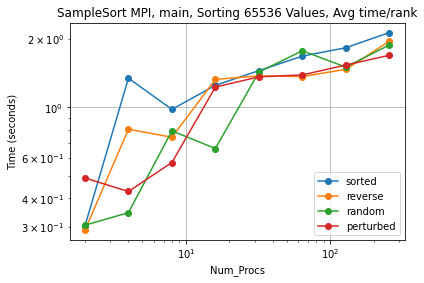

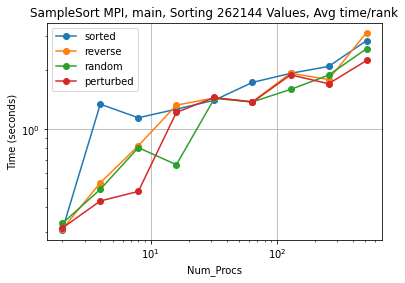

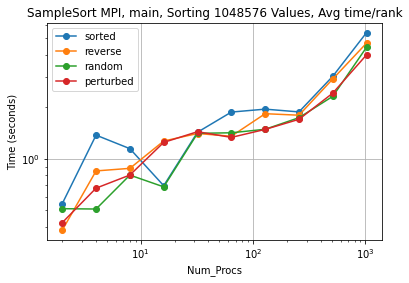

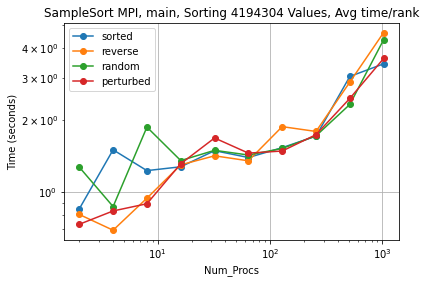

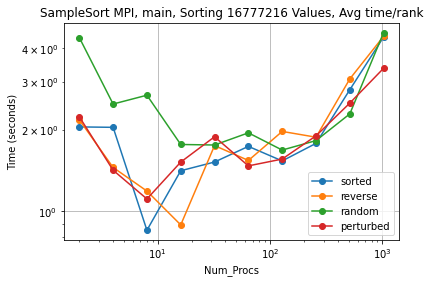

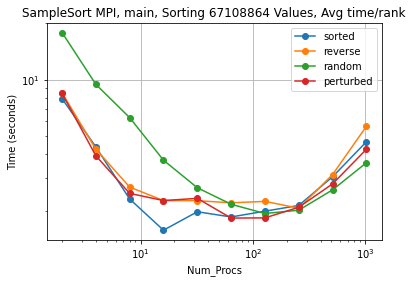

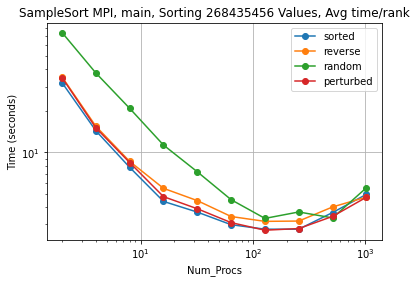

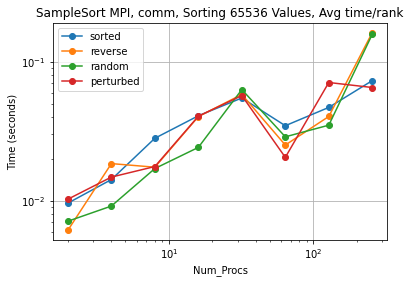

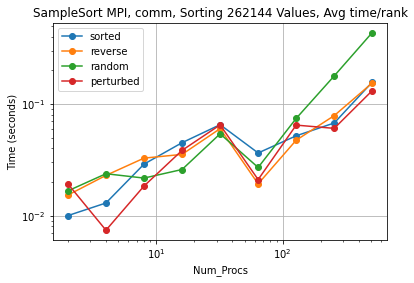

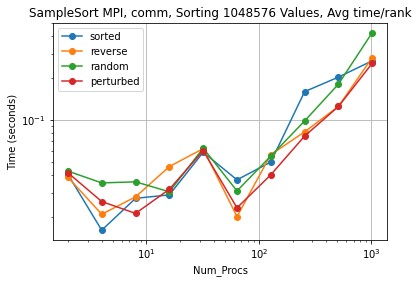

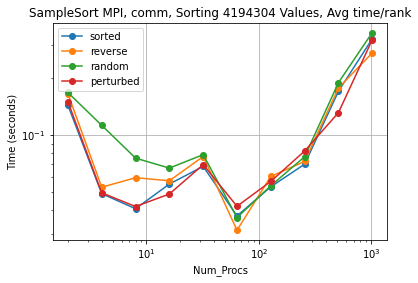

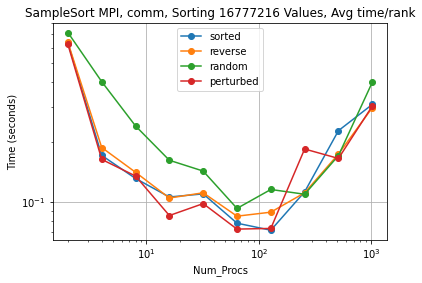

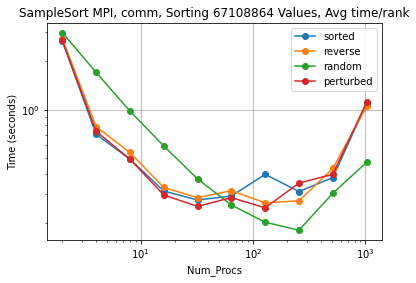

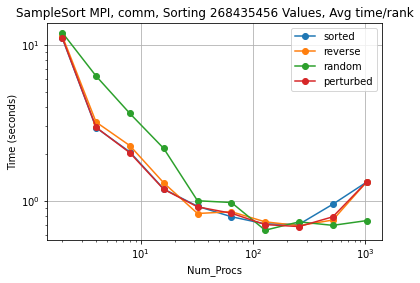

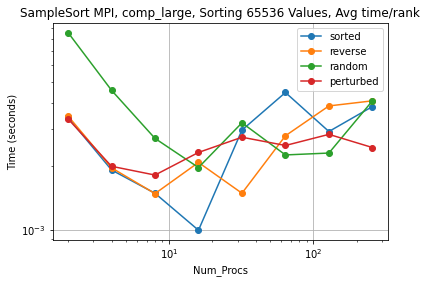

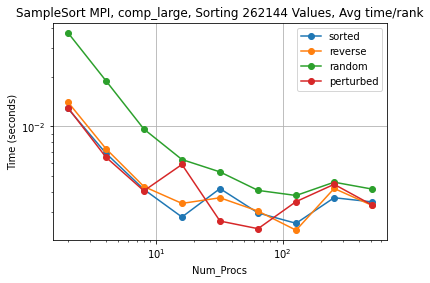

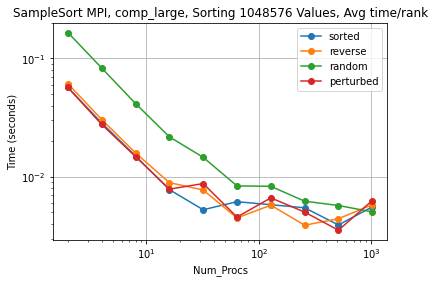

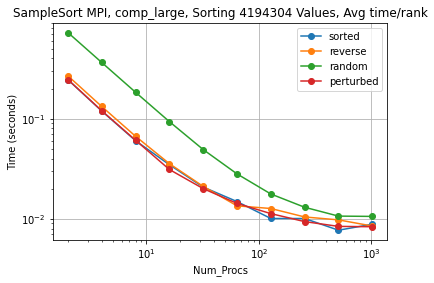

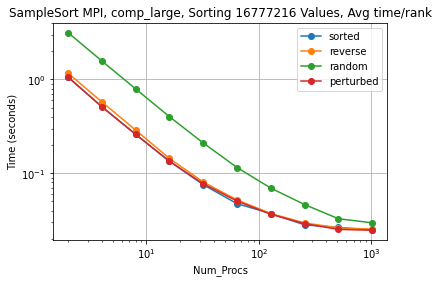

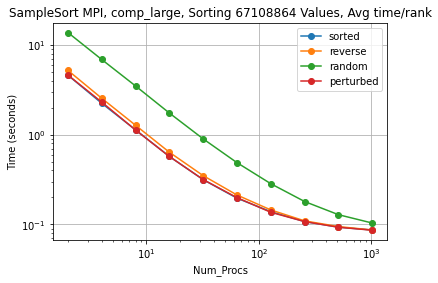

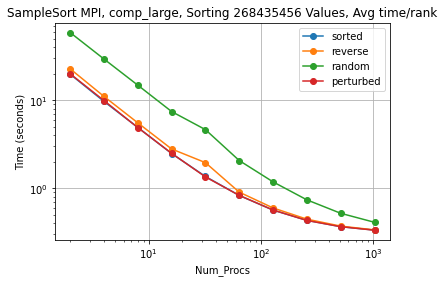

In [211]:
for name in function_names:
    for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
        masterDF = pd.DataFrame()
        for inputType in ctks.keys():
            if("strong" in inputType and "mpi" in inputType):
                tempDF = ctks[inputType].dataframe.loc[name][(inputSize, "Avg time/rank")]
                tempDF = tempDF.rename(inputType.split('_')[1])    
                masterDF = pd.concat([masterDF, tempDF], axis=1) 

        plot_pandas(
            df=masterDF,
            title="SampleSort MPI, " + str(name) + ", Sorting " + str(inputSize) + " Values, Avg time/rank",
            xlabel="Num_Procs",
            ylabel="Time (seconds)",
            loglog=True
        )

# MPI WEAK SCALING TIME PLOTS

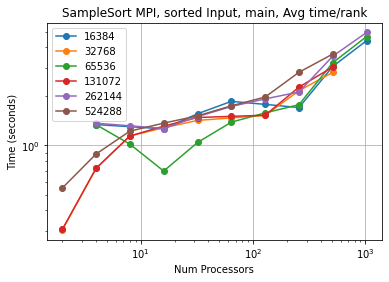

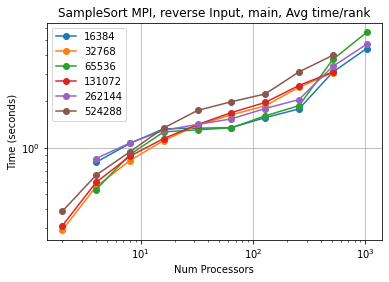

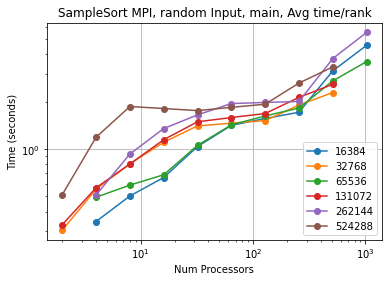

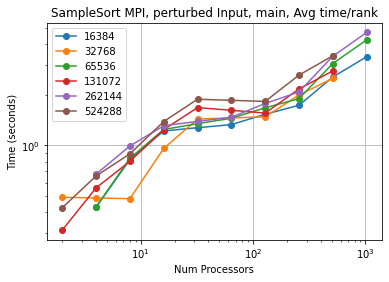

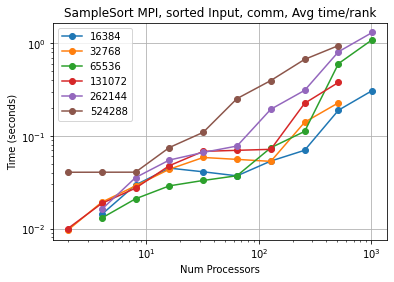

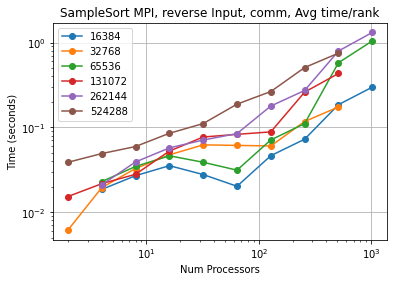

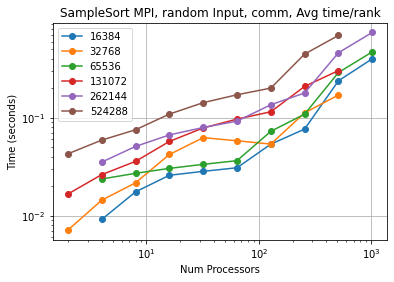

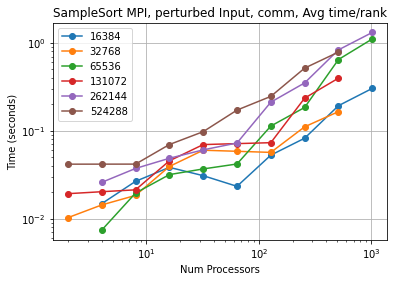

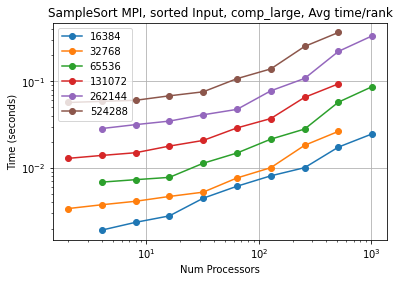

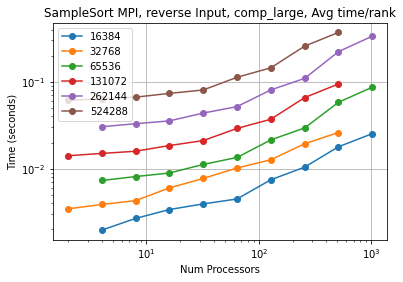

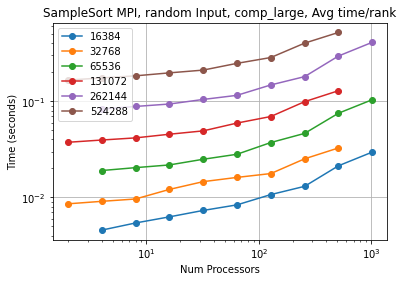

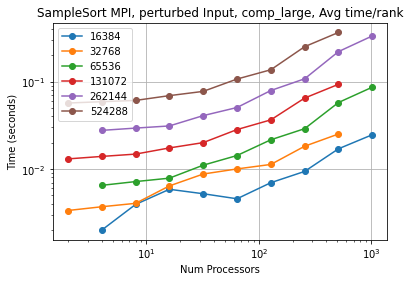

In [87]:
def count_nan(arr):
    count = 0
    for k in arr:
        if k >= 0:
            count += 1
    return count

for name in function_names:
    for inputType in ctks.keys():
        if "weak" in inputType and "mpi" in inputType:
            masterDF = pd.DataFrame()
            for inputSize in valsPerProcList: #[65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]: #[262144.0, 524288.0, 1048576.0, 2097152.0, 4194304.0]: #[256.0, 512.0, 1024.0, 2048.0, 4096.0, 8192.0, 16384.0, 32768.0, 65536.0, 131072.0, 262144.0, 524288.0, 1048576.0, 2097152.0, 4194304.0, 8388608.0, 16777216.0, 33554432.0, 67108864.0, 134217728.0]: # for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
                tempDF = ctks[inputType].dataframe.loc[name][(inputSize, "Avg time/rank")]
                    
                if(count_nan(tempDF.values) > 4):
                    tempDF = tempDF.rename(inputSize)    
                    masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
            masterDF = masterDF.apply(lambda x: x.fillna((x.shift() + x.shift(-1)) / 2))
        
            plot_pandas(
                df=masterDF,
                title="SampleSort MPI, " + str(inputType.split("_")[1]) + " Input, " + str(name) + ", Avg time/rank",
                xlabel="Num Processors",
                ylabel="Time (seconds)",
                loglog=True
            )

# CUDA STRONG SCALING TIME PLOTS

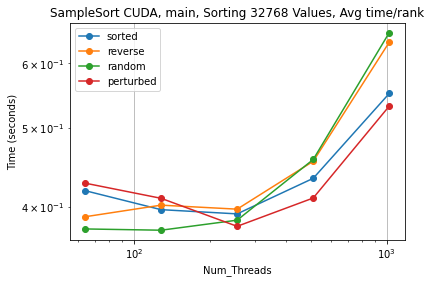

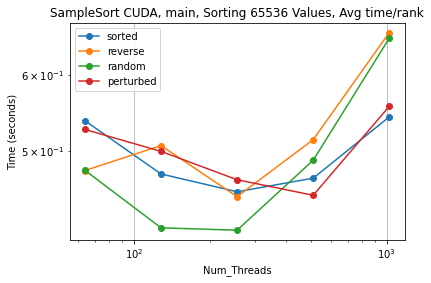

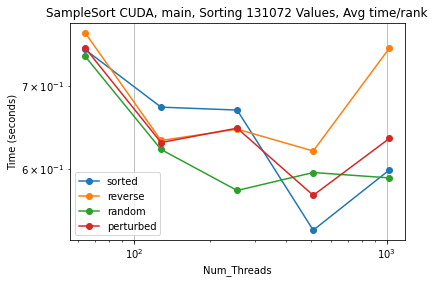

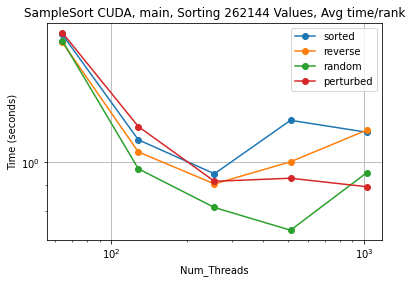

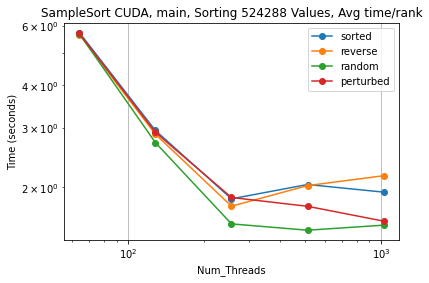

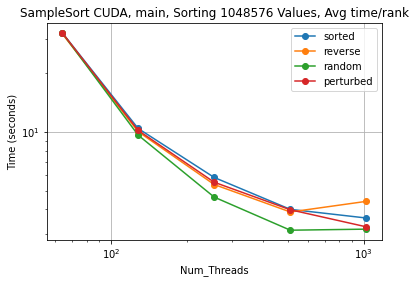

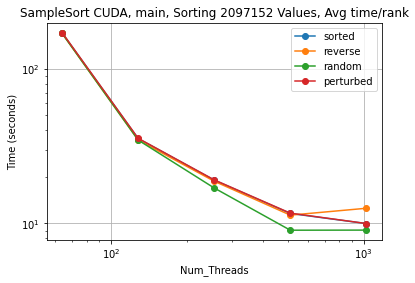

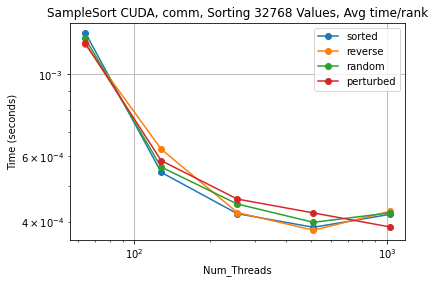

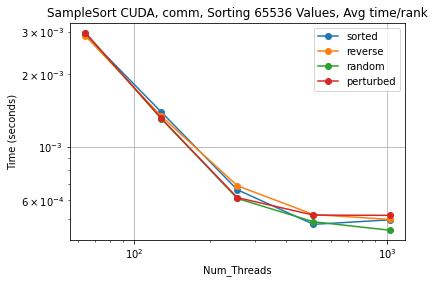

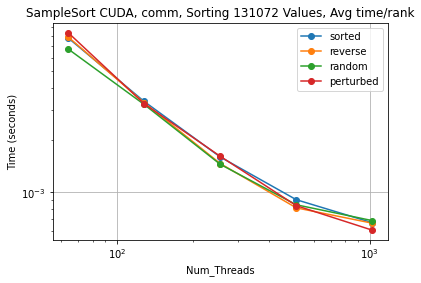

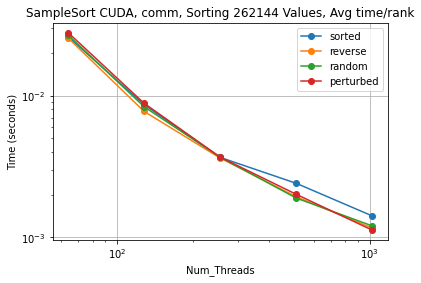

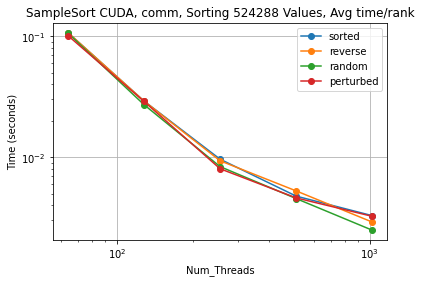

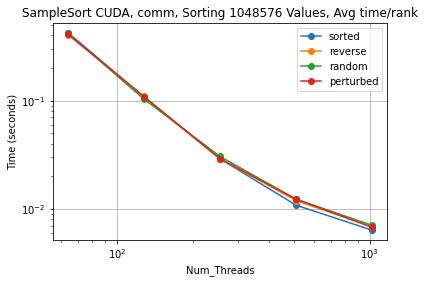

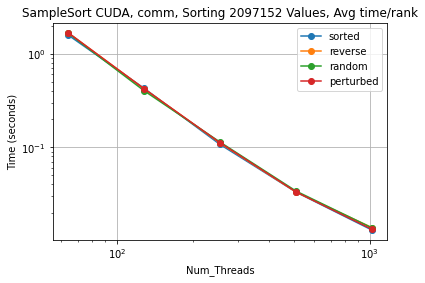

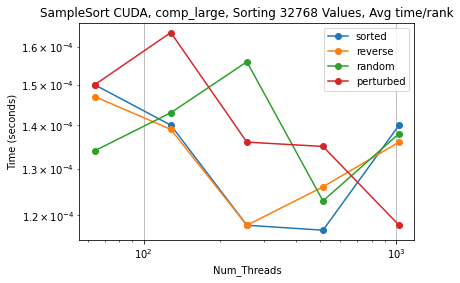

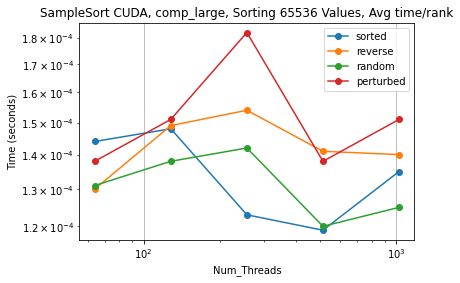

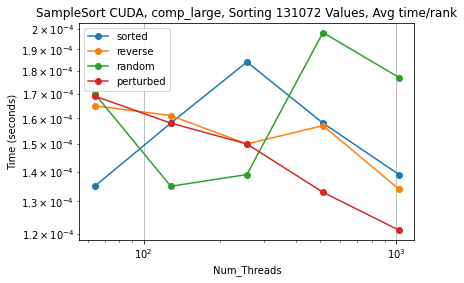

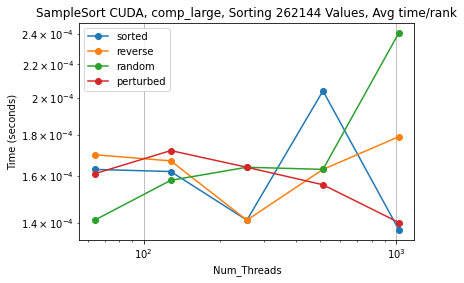

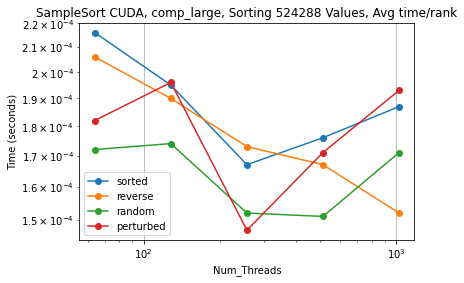

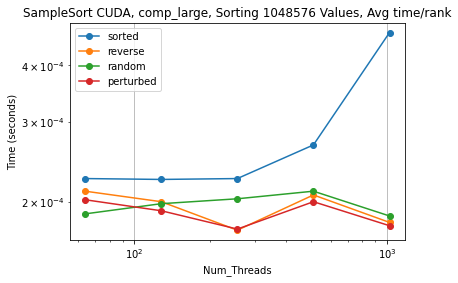

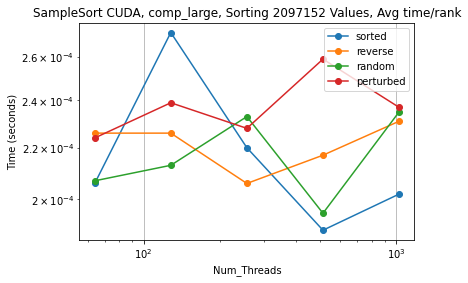

In [213]:
for name in function_names:
    for inputSize in [32768, 65536, 131072, 262144, 524288, 1048576, 2097152]:
        masterDF = pd.DataFrame()
        for inputType in ctks.keys():
            if("strong" in inputType and "cuda" in inputType):
                tempDF = ctks[inputType].dataframe.loc[name][(inputSize, "Avg time/rank")]
                tempDF = tempDF.rename(inputType.split('_')[1])    
                masterDF = pd.concat([masterDF, tempDF], axis=1) 

        plot_pandas(
            df=masterDF,
            title="SampleSort CUDA, " + str(name) + ", Sorting " + str(inputSize) + " Values, Avg time/rank",
            xlabel="Num_Threads",
            ylabel="Time (seconds)",
            loglog=True
        )

# CUDA WEAK SCALING TIME PLOTS

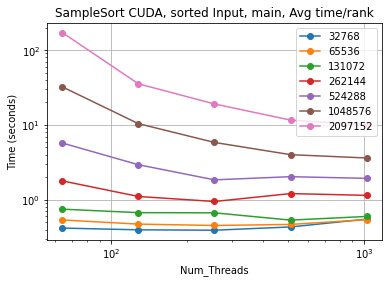

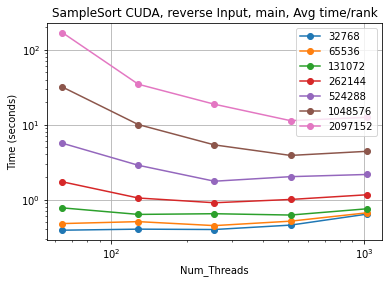

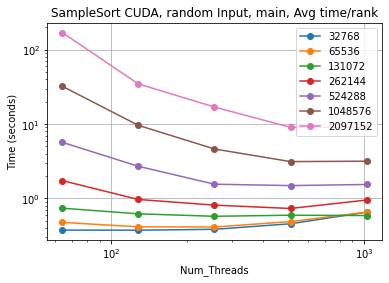

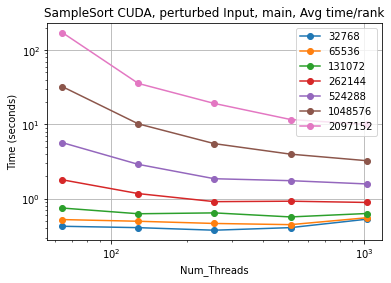

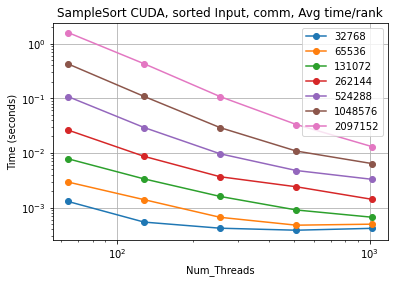

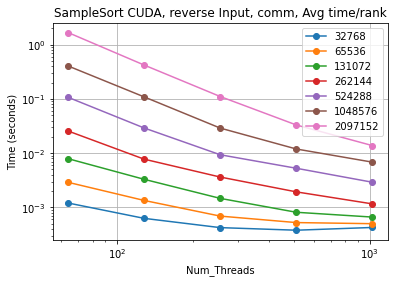

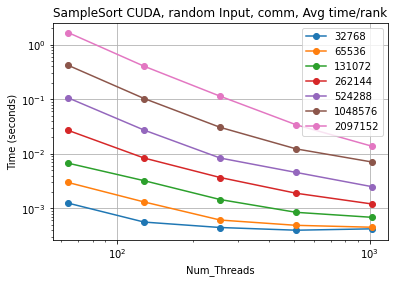

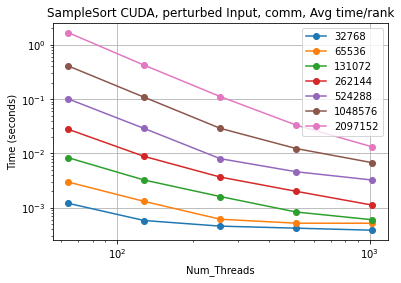

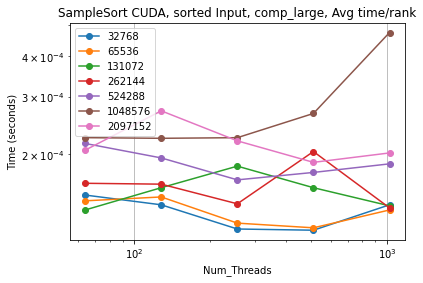

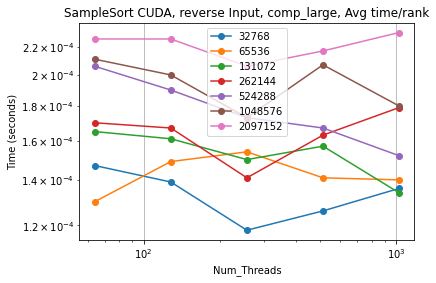

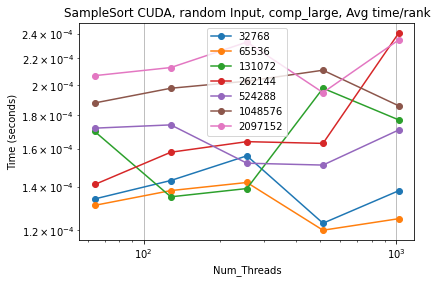

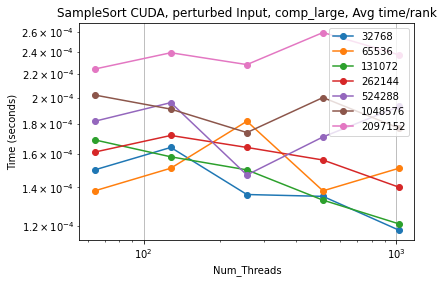

In [214]:
for name in function_names:
    for inputType in ctks.keys():
        if "weak" in inputType and "cuda" in inputType:
            masterDF = pd.DataFrame()
            for inputSize in [32768, 65536, 131072, 262144, 524288, 1048576, 2097152]: #[64, 128, 256, 512, 1024]: 
                tempDF = ctks[inputType].dataframe.loc[name][(inputSize, "Avg time/rank")]
                tempDF = tempDF.rename(inputSize)    
                masterDF = pd.concat([masterDF, tempDF], axis=1) 

            plot_pandas(
                df=masterDF,
                title="SampleSort CUDA, " + str(inputType.split("_")[1]) + " Input, " + str(name) + ", Avg time/rank",
                xlabel="Num_Threads",
                ylabel="Time (seconds)",
                loglog=True
            )

## Speedup

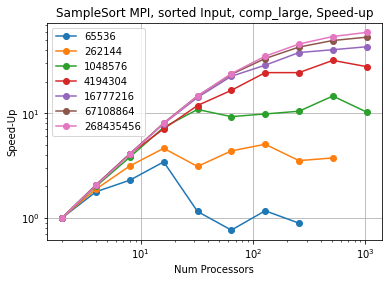

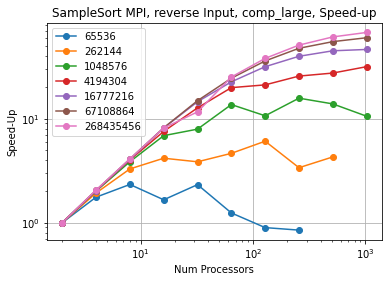

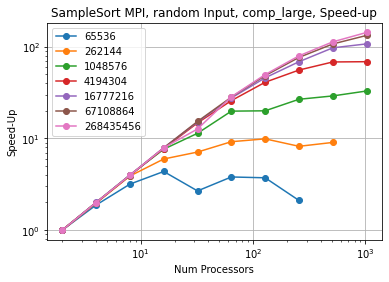

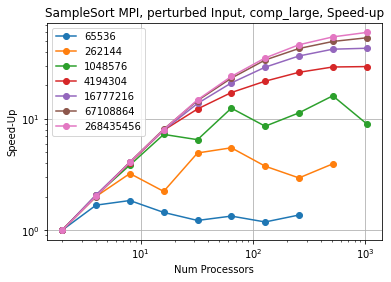

In [215]:
for inputType in ctks.keys():
    if("mpi" in inputType and "strong" in inputType):
        masterDF = pd.DataFrame()
        for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
            tempDF = ctks[inputType].dataframe.loc["comp_large"][(inputSize, "Avg time/rank")]
            tempDF = tempDF.rename(inputSize)    
            masterDF = pd.concat([masterDF, tempDF], axis=1) 

        for inputSize in masterDF.columns:
            masterDF[inputSize] = masterDF[inputSize][2] / masterDF[inputSize]

        plot_pandas(
            df=masterDF,
            title="SampleSort MPI, " + str(inputType.split("_")[1]) + " Input, comp_large, Speed-up",
            xlabel="Num Processors",
            ylabel="Speed-Up",
            loglog=True
        )

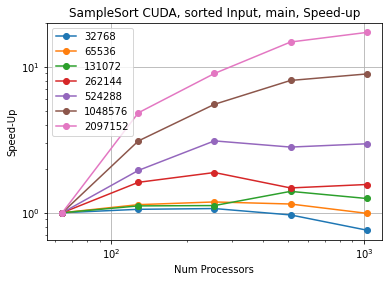

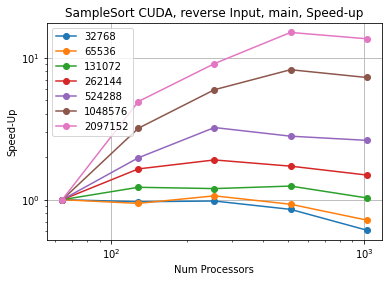

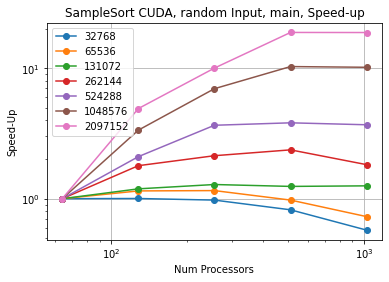

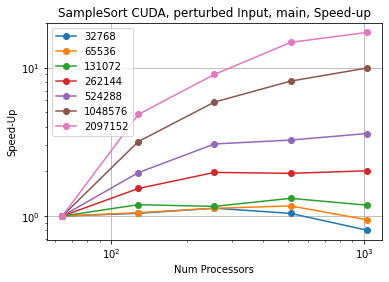

In [216]:
for inputType in ctks.keys():
    if("cuda" in inputType and "strong" in inputType):
        masterDF = pd.DataFrame()
        for inputSize in [32768, 65536, 131072, 262144, 524288, 1048576, 2097152]:
            tempDF = ctks[inputType].dataframe.loc["main"][(inputSize, "Avg time/rank")]
            tempDF = tempDF.rename(inputSize)    
            masterDF = pd.concat([masterDF, tempDF], axis=1) 

        for inputSize in masterDF.columns:
            masterDF[inputSize] = masterDF[inputSize][64] / masterDF[inputSize]

        plot_pandas(
            df=masterDF,
            title="SampleSort CUDA, " + str(inputType.split("_")[1]) + " Input, main, Speed-up",
            xlabel="Num Processors",
            ylabel="Speed-Up",
            loglog=True
        )